# Laboratorium 3 - Singular Value Decomposition

##### Aleksandra Mazur

## Zadanie 1 Przekształcenie sfery w elipsoidę

#### 1.

Wykorzystując równanie parametryczne narysowano sferę jednostkową w 3D

\begin{equation}
V = 
  \begin{bmatrix}
    cos(s)sin(t) \\
    sin(s)sin(t) \\
    cos(t)
  \end{bmatrix}
  \label{eq:aeqn}
\end{equation}

\begin{equation}
s \in [0, 2\pi] \\
t \in [0, \pi]
\end{equation}

In [1]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

In [2]:
s = np.linspace(0, 2 * np.pi, 100)
t = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(s), np.sin(t))
y = np.outer(np.sin(s), np.sin(t))
z = np.outer(np.ones(np.size(s)), np.cos(t))

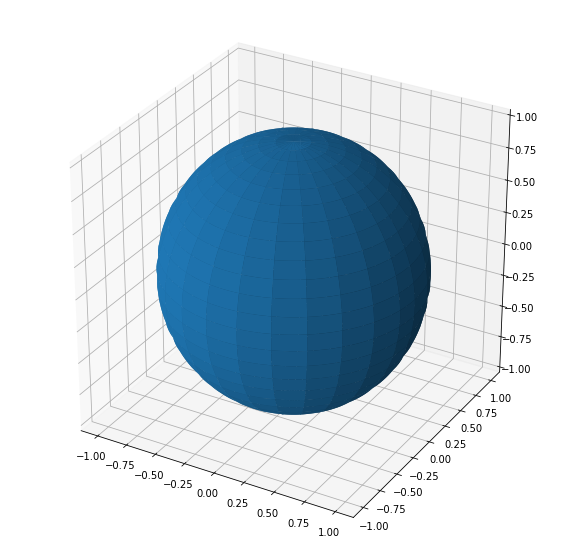

In [3]:
fig = plt.figure(figsize = (10, 10))
ax = fig.gca(projection = '3d')
ax.plot_surface(x, y, z, rstride = 4, cstride = 4)
plt.show()

Jak widać otrzymano sferę o środku w punkcie (0,0,0) i promieniu 1.

#### 2.

Wygenerowano 3 rózne macierze $\textbf{A1, A2, A3, } (\textbf{Ai} \in \mathbb{R}^{3x3})$

In [4]:
A1 = np.random.rand(3,3)
A2 = np.random.rand(3,3)
A3 = np.random.rand(3,3)

In [5]:
A1, A2, A3

(array([[0.24464669, 0.92414541, 0.2778033 ],
        [0.79277882, 0.67884153, 0.52089411],
        [0.72946289, 0.66698784, 0.8268101 ]]),
 array([[0.62562984, 0.95127195, 0.38009917],
        [0.09439638, 0.60882442, 0.05519542],
        [0.0671685 , 0.62437595, 0.53713804]]),
 array([[0.57333191, 0.47288694, 0.83356829],
        [0.67763568, 0.68590375, 0.53996876],
        [0.47749938, 0.20307962, 0.96494758]]))

Za pomocą powyższych macierzy przekształcono sfery w elipsoidy.

In [6]:
def plot_3D(x, y, z):
    fig = plt.figure(figsize = (10, 10))
    ax = plt.axes(projection="3d")
    ax.plot3D(x, y, z)
    plt.show()

In [12]:
def sphere_to_elipsoid(A):
    s = np.linspace(0, 2 * np.pi, 100)
    t = np.linspace(0, np.pi, 100)
    S, T = np.meshgrid(s, t)

    v = [lambda s, t : np.cos(s)*np.sin(t),
         lambda s, t : np.sin(s)*np.sin(t),
         lambda s, t : np.cos(t)]

    X = v[0](S,T).flatten()
    Y = v[1](S,T).flatten()
    Z = v[2](S,T).flatten()
    ST = np.row_stack([X, Y, Z])
    P = A @ ST
    plot_3D(P[0], P[1], P[2])
    return P

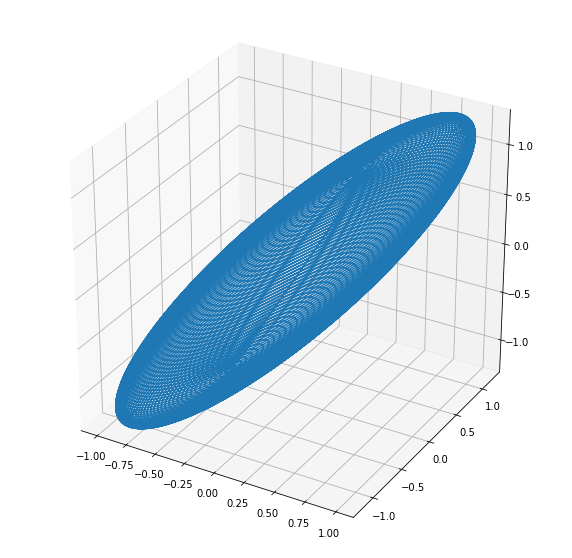

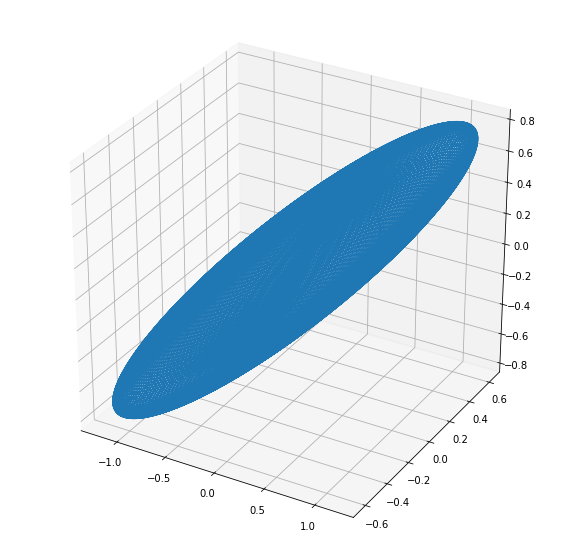

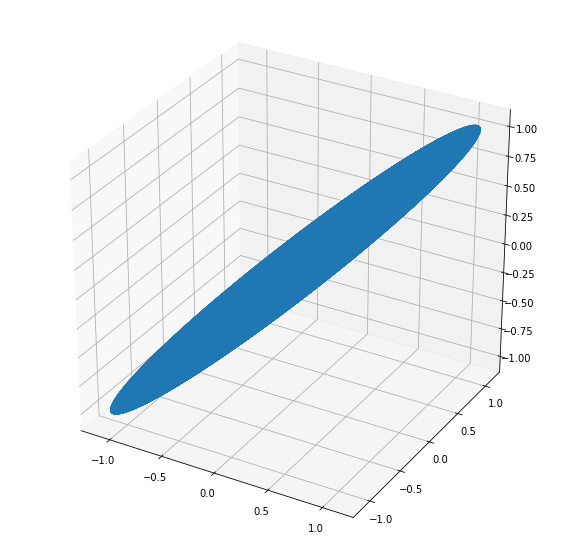

In [13]:
P1 = sphere_to_elipsoid(A1)
P2 = sphere_to_elipsoid(A2)
P3 = sphere_to_elipsoid(A3)

#### 3.

Dla każdej ze stworzonych macierzy dokonano rozkładu według wartosci osobliwych (SVD).

In [14]:
U1, S1, Vh1 = np.linalg.svd(A1)
U2, S2, Vh2 = np.linalg.svd(A2)
U3, S3, Vh3 = np.linalg.svd(A3)

In [15]:
def SVD_plot(sigma, P, U):
    x_start, y_start, z_start = [0,0,0]
    x_end = y_end = z_end = [0,0,0]
    for i, s1 in enumerate(np.diag(sigma)):
        a = np.dot(U, s1)
        x_end[i] = a[0]
        y_end[i] = a[1]
        z_end[i] = a[2]
    quiver = [x_start, y_start, z_start, x_end, y_end, z_end]

    fig = plt.figure(figsize = (10, 10))
    ax = fig.gca(projection='3d')
    ax.scatter(x, y, z)
    ax.scatter(P[0], P[1], P[2], color='red')
    ax.quiver(x_start, y_start, z_start, x_end, y_end, z_end, color='black')
    
    plt.show()

#### Macierz $A_1$

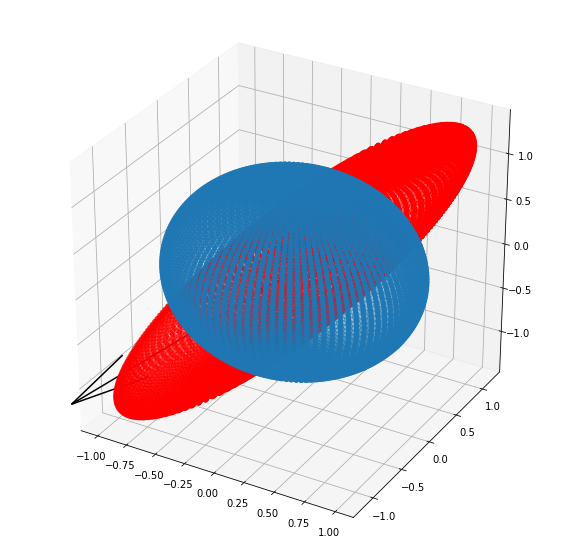

In [16]:
SVD_plot(S1, P1, U1)

#### Macierz $A_2$

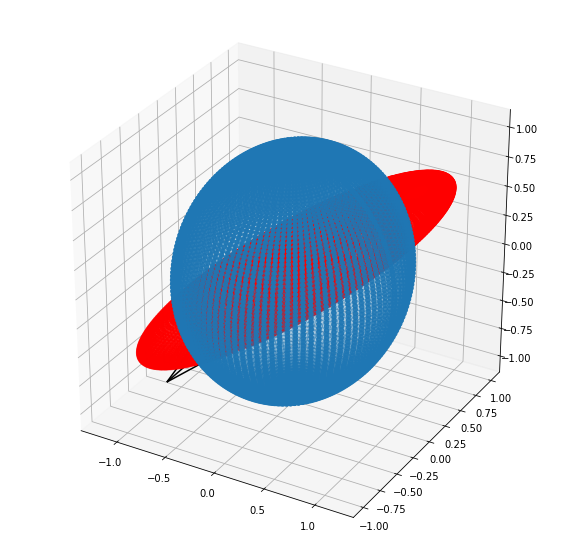

In [17]:
SVD_plot(S2, P2, U2)

#### Macierz $A_3$

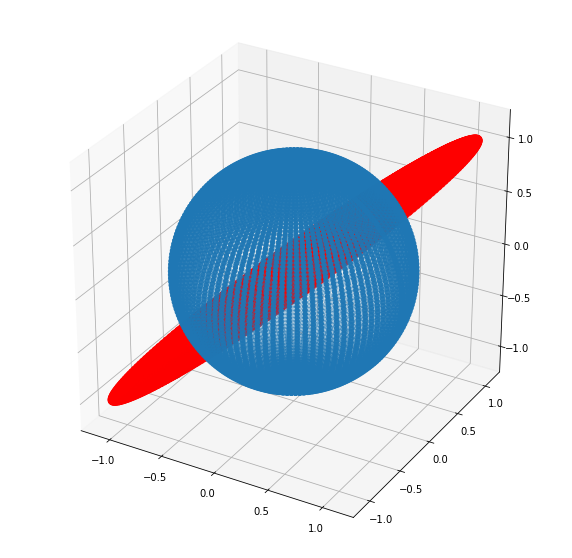

In [18]:
SVD_plot(S3, P3, U3)

#### 4.

Znaleziono taką macierz Ai, aby stosunek jej największej i najmniejszej wartości osobliwej był większy od 100.

In [19]:
def find_matrix():
    A4 = np.random.rand(3, 3)
    U4, S4, Vh4 = np.linalg.svd(A4)
    while S4[0] / S4[-1] < 100:
        A4 = np.random.rand(3, 3)
        U4, S4, Vh4 = np.linalg.svd(A4)
    print(A4)
    return A4

[[0.84016329 0.22204681 0.96198803]
 [0.45004641 0.06534174 0.69247687]
 [0.29344474 0.16593287 0.0116182 ]]


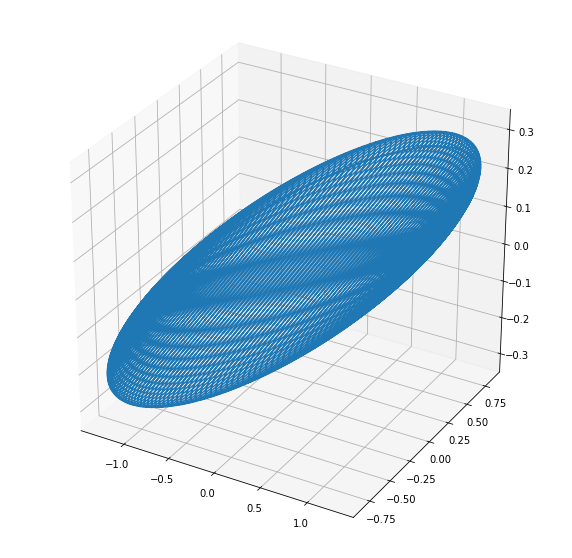

In [20]:
A4 = find_matrix()
P4 = sphere_to_elipsoid(A4)

#### 5.

Dla wybranej macierzy Ai przedstawiono wizualizacje $SV_i^T$, $S\Sigma_iV_i^T$ oraz $SU_i\Sigma_iV_i^T$

gdzie

$A_i = U_i\Sigma_iV_i^T$
oraz
$S$ - sfera z punktu 1.

Powyższe wizualizacje przedstawiono dla macierzy $A_1$.

In [21]:
U, sigma, V = np.linalg.svd(A1)

a) $SV_i^T$

In [22]:
def sphere():
    s = np.linspace(0, 2 * np.pi, 100)
    t = np.linspace(0, np.pi, 100)
    S, T = np.meshgrid(s, t)

    v = [lambda s, t : np.cos(s)*np.sin(t),
         lambda s, t : np.sin(s)*np.sin(t),
         lambda s, t : np.cos(t)]

    X = v[0](S,T).flatten()
    Y = v[1](S,T).flatten()
    Z = v[2](S,T).flatten()
    ST = np.row_stack([X, Y, Z])
    return ST

In [23]:
def ex5a():
    ST = sphere()
    E = V.T @ ST
    plot_3D(E[0], E[1], E[2])

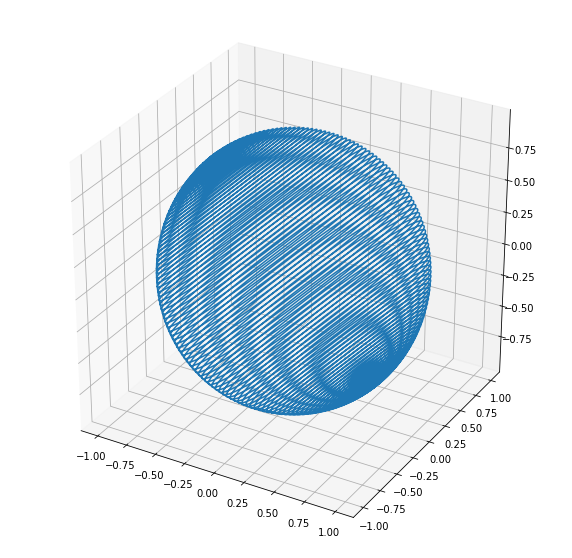

In [24]:
ex5a()

b) $S\Sigma_iV_i^T$

In [25]:
def ex5b():
    ST = sphere()
    E = ST.T * sigma @ V
    E = E.T
    plot_3D(E[0], E[1], E[2])

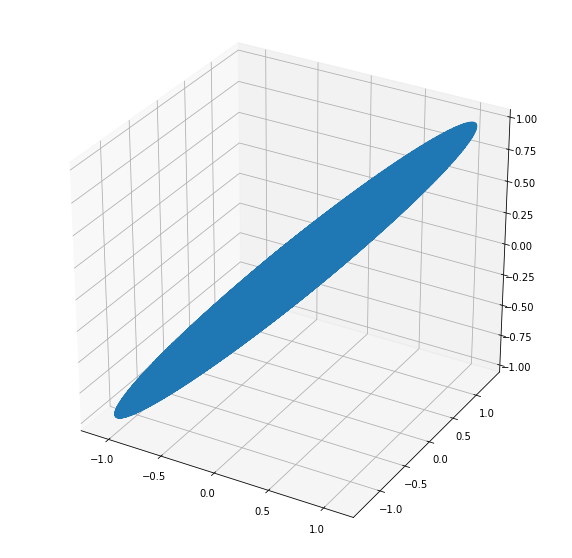

In [26]:
ex5b()

c) $SU_i\Sigma_iV_i^T$

In [27]:
def ex5c():
    ST = sphere()
    E = ST.T @ U * sigma @ V
    E = E.T
    plot_3D(E[0], E[1], E[2])

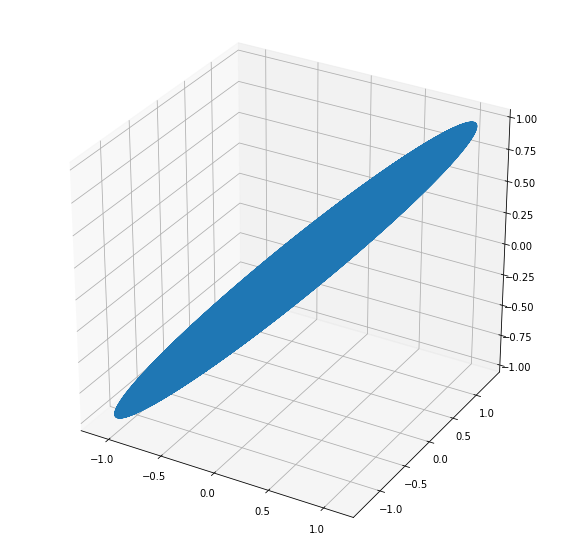

In [28]:
ex5c()

## Zadanie 2 Kompresja obrazu

Przygotowano przykładowe zdjęcie o rozmiarze 512 × 512 pikseli.

<img src="Lenna.png">

In [24]:
import imageio
import os
import sys
from PIL import Image
from scipy import linalg

Lenna = np.asarray(imageio.imread('Lenna.png'))
U, S, V = np.linalg.svd(Lenna)

In [25]:
Lenna

array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]

In [26]:
def low_rank_approximation(filename, k):
    path, ext = os.path.splitext(filename)
    img = Image.open(filename)
    width = img.width
    height = img.height
    X = np.asarray(img)
    X1 =  X.transpose(0,2,1).reshape(height * 3, width)
    X2 = X.transpose(1,2,0).reshape(width * 3, height)
    U,S,A1 = linalg.svd(X1)
    U,S,A2 = linalg.svd(X2)
    r2 = k * 3
    a1 = A1[:r2, :]
    a2 = A2[:r2, :]
    pa1 = a1.T.dot(a1)
    pa2 = a2.T.dot(a2)
    X2 = np.tensordot(X,pa1,(1,0))
    X3 = np.tensordot(X2,pa2,(0,0))
    X4 = X3.transpose(2,1,0)
    img2 = Image.fromarray(np.uint8(X4))
    file = path + str(k) + ext
    img2.save(file)

In [27]:
image = "Lenna.png"
for i in [1, 2, 5, 10, 15, 20, 40, 60, 80, 100]:
    low_rank_approximation(image, i)

Aproksymacja dla k równego odpowiednio 1, 2, 5, 10, 15, 20, 40, 60, 80, 100:

<img src="Lenna1.png">

<img src="Lenna2.png">

<img src="Lenna5.png">

<img src="Lenna10.png">

<img src="Lenna15.png">

<img src="Lenna20.png">

<img src="Lenna40.png">

<img src="Lenna60.png">

<img src="Lenna80.png">

<img src="Lenna100.png">

Jak widać powyżej obraz jest coraz lepszy i coraz bardziej podobny do oryginału wraz ze wzrostem K. Dla małych wartości K jest całkiem rozmazany, natomiast dla dużych - ostry i dobrze widoczny.